## Model with same dropout rate(0.5) for dropout layers.

In [14]:
from tensorflow.keras.layers import Dropout

model = Sequential()
initializer = tf.keras.initializers.HeUniform()

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer, padding="same", input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(Conv2D(512, (3, 3), activation='relu', kernel_initializer=initializer, padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(BatchNormalization())

model.add(Dense(2, activation='softmax'))

model.summary()
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model for 20 epochs with a batch size of 25
history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(val_images, val_labels), batch_size=25, verbose=1)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)

# Evaluate the model on validation data
validation_loss, validation_acc = model.evaluate(val_images, val_labels)

# Print the test and validation accuracy
print('Test accuracy:', test_acc)
print('Validation accuracy:', validation_acc)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 conv2d_13 (Conv2D)          (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 128, 128, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 128)    

This model consists of 14 layers. There are four 2D convolutional layers with with increasing filters (64, 128, 256, 512), each having a (3, 3) kernel size, 'relu' activation, and 'same' padding. four Max-pooling layers of pool size (2,2) are used in the layers. The model includes three dropout layers with a dropout rate of 0.5. One flatten is used to convert 2D features to 1D features.


The model is compiled with the 'RMSprop' optimizer and the 'sparse_categorical_crossentropy' loss function.The accuracy metric is used to evaluate the model's performance.the model is trained for 20 epochs with a batch size of 25. Here test accuracy is 90% and validation accuracy is 91% .

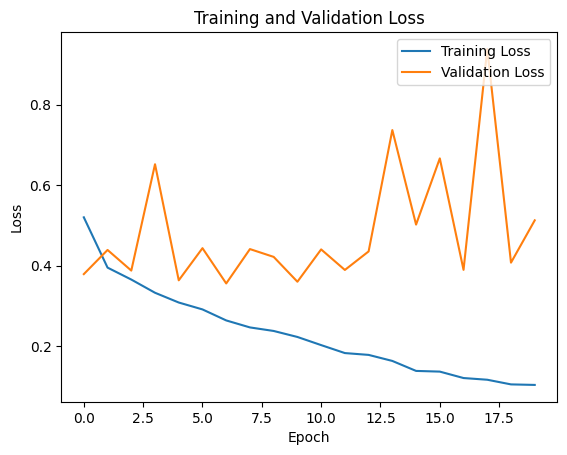

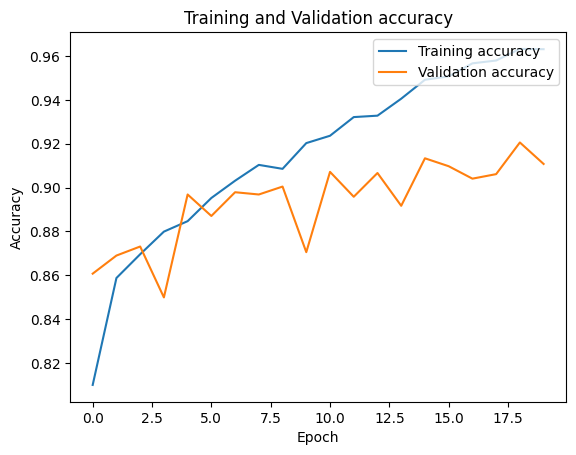

In [15]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()


In [12]:
}